In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7033.0,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38737.0,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0


In [6]:
# dropping(temporary)  society and price_per_sqft columns because these will not be used in our predictive modelling
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79
1,flat,sector 84,0.41,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23
2,house,sector 26,17.30,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124
3,house,sector 38,4.30,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41
4,house,sector 92,1.80,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0


<Axes: >

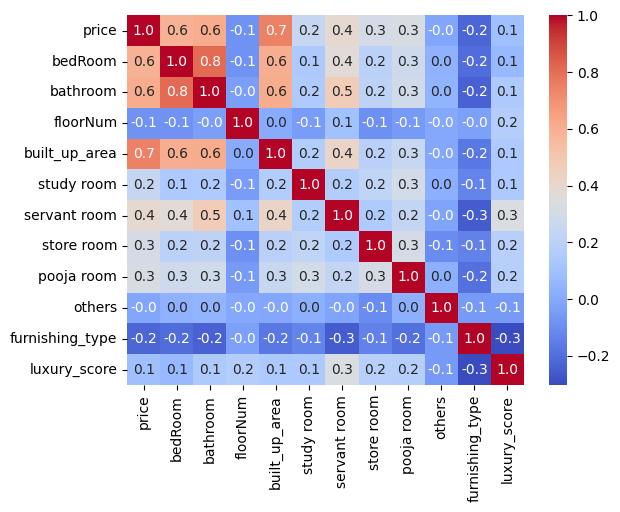

In [21]:
numeric_train_df = train_df.select_dtypes(include=['number'])
sns.heatmap(numeric_train_df.corr(),annot=True,fmt='.1f',cmap='coolwarm')

In [24]:
numeric_train_df.corr()['price'].sort_values(ascending=False)
# strong multi-collinearilty 
# luxury_score, others, floorNum -> not sure on these columns

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
furnishing_type   -0.223511
Name: price, dtype: float64

In [13]:
# Lets do feature selection on luxury_score, others, floorNum and other non - numerical columns (property_type,sector,agePossession)